In [1]:
# libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as st  
import numpy as np
from pandas import Series, DataFrame
# from sklearn.impute import SimpleImputer
# from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")


In [2]:
def linearRegressionPlot(df_x_axis, df_y_axis, xlable, ylabel):
    scipy_linear_model = st.stats.linregress(df_x_axis, df_y_axis) # scipy_linear_model
    rvalue = scipy_linear_model[2]
    text =   "  y=" +  str(round(scipy_linear_model[0], 2)) + "x + " + str(round(scipy_linear_model[1], 2)) + "  p-val=" + str(scipy_linear_model[3])
    # print(scipy_linear_model)
    y_axiz = df_x_axis * scipy_linear_model[0] + scipy_linear_model[1]  # use slope and intercept from scipy_linear_model
    plt.scatter(df_x_axis, df_y_axis)
    plt.plot(df_x_axis, y_axiz ,color="g")
    plt.xlabel(str(xlable))
    plt.ylabel(ylabel)
    plt.title("r-value=" + str(rvalue) + " " + text)
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams.update({'text.color': "red"})
    # plt.text(2, 40, "The r-value = " + str(rvalue) + "  " + text, fontsize = 12)
    # plt.savefig("./Resources/" + xlable + "_" + ylabel + ".png")  
    return(plt)

In [3]:
# df_elec = pd.read_csv("D:/Bellabeat/Consumer_reviews_amazon_dataset_4_12_23/electronics.csv")
# df_elec
# ''' 

# rating 
# timestamp 
# category

# dateAdded	name	reviews.doRecommend	reviews.rating	reviews.text	reviews.title	reviews.text.wordcount	positive.comments	negative.comments
# '''

# df_elec = df_elec[["timestamp", "rating", "category"]]
# new_df_elec = df_elec[(df_elec['timestamp'] > '2014-08-28') & (df_elec['timestamp'] <= '2018-11-24')]

# # renaming columns to match the other tables
# new_df_elec.rename(columns={"timestamp":"dateAdded", "rating": "reviews.rating","category": "name"}, inplace=True)

# # adding do.recommend column
# new_df_elec['reviews.doRecommend'] = ""

# # adding a reviews.doRecommend column
# # new_df_elec[new_df_elec['reviews.doRecommend'] > 3] = new_df_elec['reviews.doRecommend'].fillna('True')
# new_df_elec['reviews.doRecommend'] = np.where(new_df_elec['reviews.rating'] > 3, '1', '0')

# # df_elec.loc[df_elec['reviews.rating'] < 4, 'reviews.doRecommend'] = df_elec['reviews.doRecommend'].fillna('False')
# # new_df_elec = df_elec[["dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"]]


# # new_df_elec.isnull().sum()

# # there are no nulls in this dataset
# # name_count = concat_df["name"].value_counts()


# new_df_elec[new_df_elec["reviews.rating"]==1].plot(kind='bar', figsize=(40,20), fontsize=18) 

# # test = concat_df.groupby(['name']).size().reset_index(name='counts')

# # fig = plt.figure(figsize=(40,6))
# # plt.bar(test['counts']>2000, test['name'],width=.2)
# # plt.title("product.names")
# # plt.xlabel("product")
# # plt.ylabel("count")
# # plt.show()
# # type(name_count)






# new_df_elec.head(50)
# # new_df_elec.shape

# # 2014-08-28 00:00:00+00:00 2018-11-24


# # df_elec.head()








In [4]:
df_260 = pd.read_csv("D:/Bellabeat/Consumer_reviews_amazon_dataset_4_12_23/260_Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
# df_260
""" 
(name)
-echo 
-fire 
-tablet 
-kindle
-echo 
-Smart
-laptop 
-speaker
-bluetooth 

dateAdded
reviews.rating
reviews.doRecommend	
reviews.text
reviews.title

In the cleaning of the data, correlating the low ratings with a False and the high ratings with a True. I set 4 and 5 equal to True and 1,2, and 3 to False.
reviews.doRecommend and reviews.rating.
Merge all three datasets together

df3 = pd.concat([df1, df2])

FALSE = 0 
TRUE = 1
"""
# df_260.shape
# df_260.head() 

df_260.loc[df_260['reviews.rating'] > 3, 'reviews.doRecommend'] = df_260['reviews.doRecommend'].fillna('True')
df_260.loc[df_260['reviews.rating'] < 4, 'reviews.doRecommend'] = df_260['reviews.doRecommend'].fillna('False')
new_df_260 = df_260[["dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"]]

new_df_260.head()
# df_260.head()
new_df_260.shape




(28332, 6)

In [5]:
df_97 = pd.read_csv("D:/Bellabeat/Consumer_reviews_amazon_dataset_4_12_23/97_Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

"""
- kindle
-echo
-bluetooth speaker
- E-reader

Replaced the 13 empty cells (nones) in reviews.title with "untitled" 
Merge all three datasets together

"""
new_df_97 = df_97[["dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"]]



# new_df_97.loc[new_df_97['reviews.rating'] > 3, 'reviews.doRecommend'] = new_df_97['reviews.doRecommend'].fillna('True')

new_df_97["reviews.title"].replace({None:"untitled"},inplace=True)

# df3 = pd.concat([df1, df2])
# new_df_97['reviews.title'] = new_df_97['reviews.title'].replace(np.nan, 0)

new_df_97.isnull().sum()

new_df_97.head()
new_df_97.shape


(5000, 6)

In [6]:
df_47 = pd.read_csv("D:/Bellabeat/Consumer_reviews_amazon_dataset_4_12_23/47_1429_1.csv")
df_47
"""computers 
-wireless
-speakers
-TVs
replace the - empty cells in reviews.title with 0
replace the - empty cells in out reviews.text with 0
replace name - empty cells with "unnamed"
replacing any additional empty cells with 0 or unnamed
correlating the low ratings with a False and the high ratings with a True. Setting 4 and 5 equal to True and 1,2, and 3 to False for reviews.doRecommend and reviews.rating.
re naming reviews.dateAdded to dateAdded to match other two datasets
Merge all three datasets together
"""

new_df_47 = df_47[["reviews.dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"]]


new_df_47["reviews.title"].replace({None:"untitled"},inplace=True)
new_df_47["reviews.text"].replace({None:"untitled"},inplace=True)
new_df_47["name"].replace({None:"unnamed"},inplace=True)

new_df_47['reviews.rating'] = new_df_47['reviews.rating'].fillna(0)

new_df_47['reviews.doRecommend'] = new_df_47['reviews.doRecommend'].fillna(0)

new_df_47.loc[df_47['reviews.rating'] > 3, 'reviews.doRecommend'] = new_df_47['reviews.doRecommend'].fillna('True')
new_df_47.loc[df_47['reviews.rating'] < 4, 'reviews.doRecommend'] = new_df_47['reviews.doRecommend'].fillna('False')

new_df_47.rename(columns={"reviews.dateAdded":"dateAdded"}, inplace=True)
new_df_47.isnull().sum()

# new_df_47.loc[new_df_47["reviews.rating"].isnull()]
# new_df_47.head()
# new_df_47.fillna()
new_df_47.head()
new_df_47.shape

(34660, 6)

In [7]:
""" 
Concatenate all three dataframes
new_df_47
new_df_97
new_df_260
to eliminate potential duplicates and to ensure the three datasets are not contained in one another , ensure there are no duplicates!!!

before checking for duplicates, we have (67992, 6) 
after checking for duplicates using drop.dulicates for all columns we have (65821, 6)

"dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"
"name" = productname 

*From reviews.text we can find the length of the review and compare it to the ratings. Some people took the time to write a genuine review

    concat_df.groupby(['COLUMN_NAME']).size().reset_index(name='counts')

*From reviews.title we can get keywords/phrases and correlate it with "name" column 
    done
*correlate reviews.rating with the name. if i find that a name more commonly has a negative or positive review, I can check the reviews.text
to see why it was liked or disliked and use that to formulate a marketing tactic for bellabeat.

changed reviews.doRecommend, positive.comments, and negative.comments to numerical values as to create a linear regression graph

"""
# merge_df = pd.merge(new_df_47, new_df_97, new_df_260, on=["id"], how="outer")
# merge_df.head()

concat_df = pd.concat([new_df_47, new_df_97, new_df_260,], ignore_index=True)
concat_df.head(50)
concat_df.shape

concat_df.drop_duplicates(subset=["dateAdded","name", "reviews.doRecommend","reviews.rating","reviews.text", "reviews.title"], keep='first', inplace=True)
concat_df.shape

concat_df["reviews.text.wordcount"] = concat_df['reviews.text'].str.split().str.len()
concat_df.head()

pos_list = ["love it", "great", "awesome", "amazing", "pretty cool","the best", "good product", "excellent product", "excellent", "great quality", "five stars", "loves it", "loved it","wonderful"]
pos_list = [x.upper() for x in pos_list]
neg_list = ["bad", "horrible", "not great", "rough", "ruined", "broke", "broken", "confusing", "sucked", "bad quality", "bad product", "awful", "0 stars", "1 star", "hated it", "hate it", "hates it", "ruined my marriage"]
neg_list = [x.upper() for x in neg_list]
# concat_df["positive.comments"] = concat_df["reviews.text"].str.split()

concat_df["positive.comments"] = concat_df['reviews.title'].str.upper().apply(lambda x: any(i in x for i in pos_list))
concat_df["negative.comments"] = concat_df['reviews.title'].str.upper().apply(lambda x: any(i in x for i in neg_list))

concat_df["reviews.doRecommend"].replace({True:1},inplace=True)
concat_df["reviews.doRecommend"].replace({False:0},inplace=True)

concat_df["positive.comments"].replace({True:1},inplace=True)
concat_df["positive.comments"].replace({False:0},inplace=True)

concat_df["negative.comments"].replace({True:1},inplace=True)
concat_df["negative.comments"].replace({False:0},inplace=True)

#function to change date from string to date
concat_df["dateAdded"] = pd.to_datetime(concat_df["dateAdded"]).dt.normalize()

#function to find date range of the reviews
min_date = concat_df["dateAdded"].min()
max_date = concat_df["dateAdded"].max()
print(str(min_date),str(max_date))

concat_df.head(1)



2014-08-28 00:00:00+00:00 2018-11-24 00:00:00+00:00


,dateAdded,name,reviews.doRecommend,reviews.rating,reviews.text,reviews.title,reviews.text.wordcount,positive.comments,negative.comments
0,2017-07-03 00:00:00+00:00,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",1,5.0,This product so far has not disappointed. My c...,Kindle,27,0,0


'\nThe chart below displays the review count over the amount of 25 for each electronic. The amounts of reviews gives an idea/representation of how may sales there were from \nAugust of 2014 to November of 2018. From this, we can hypothesyze that the fire tablet 7 display wifi 8GB Magenta was the most sold item in Amazon with ~.14,000 reviews. The magenta was preferred \nover the color black \n'

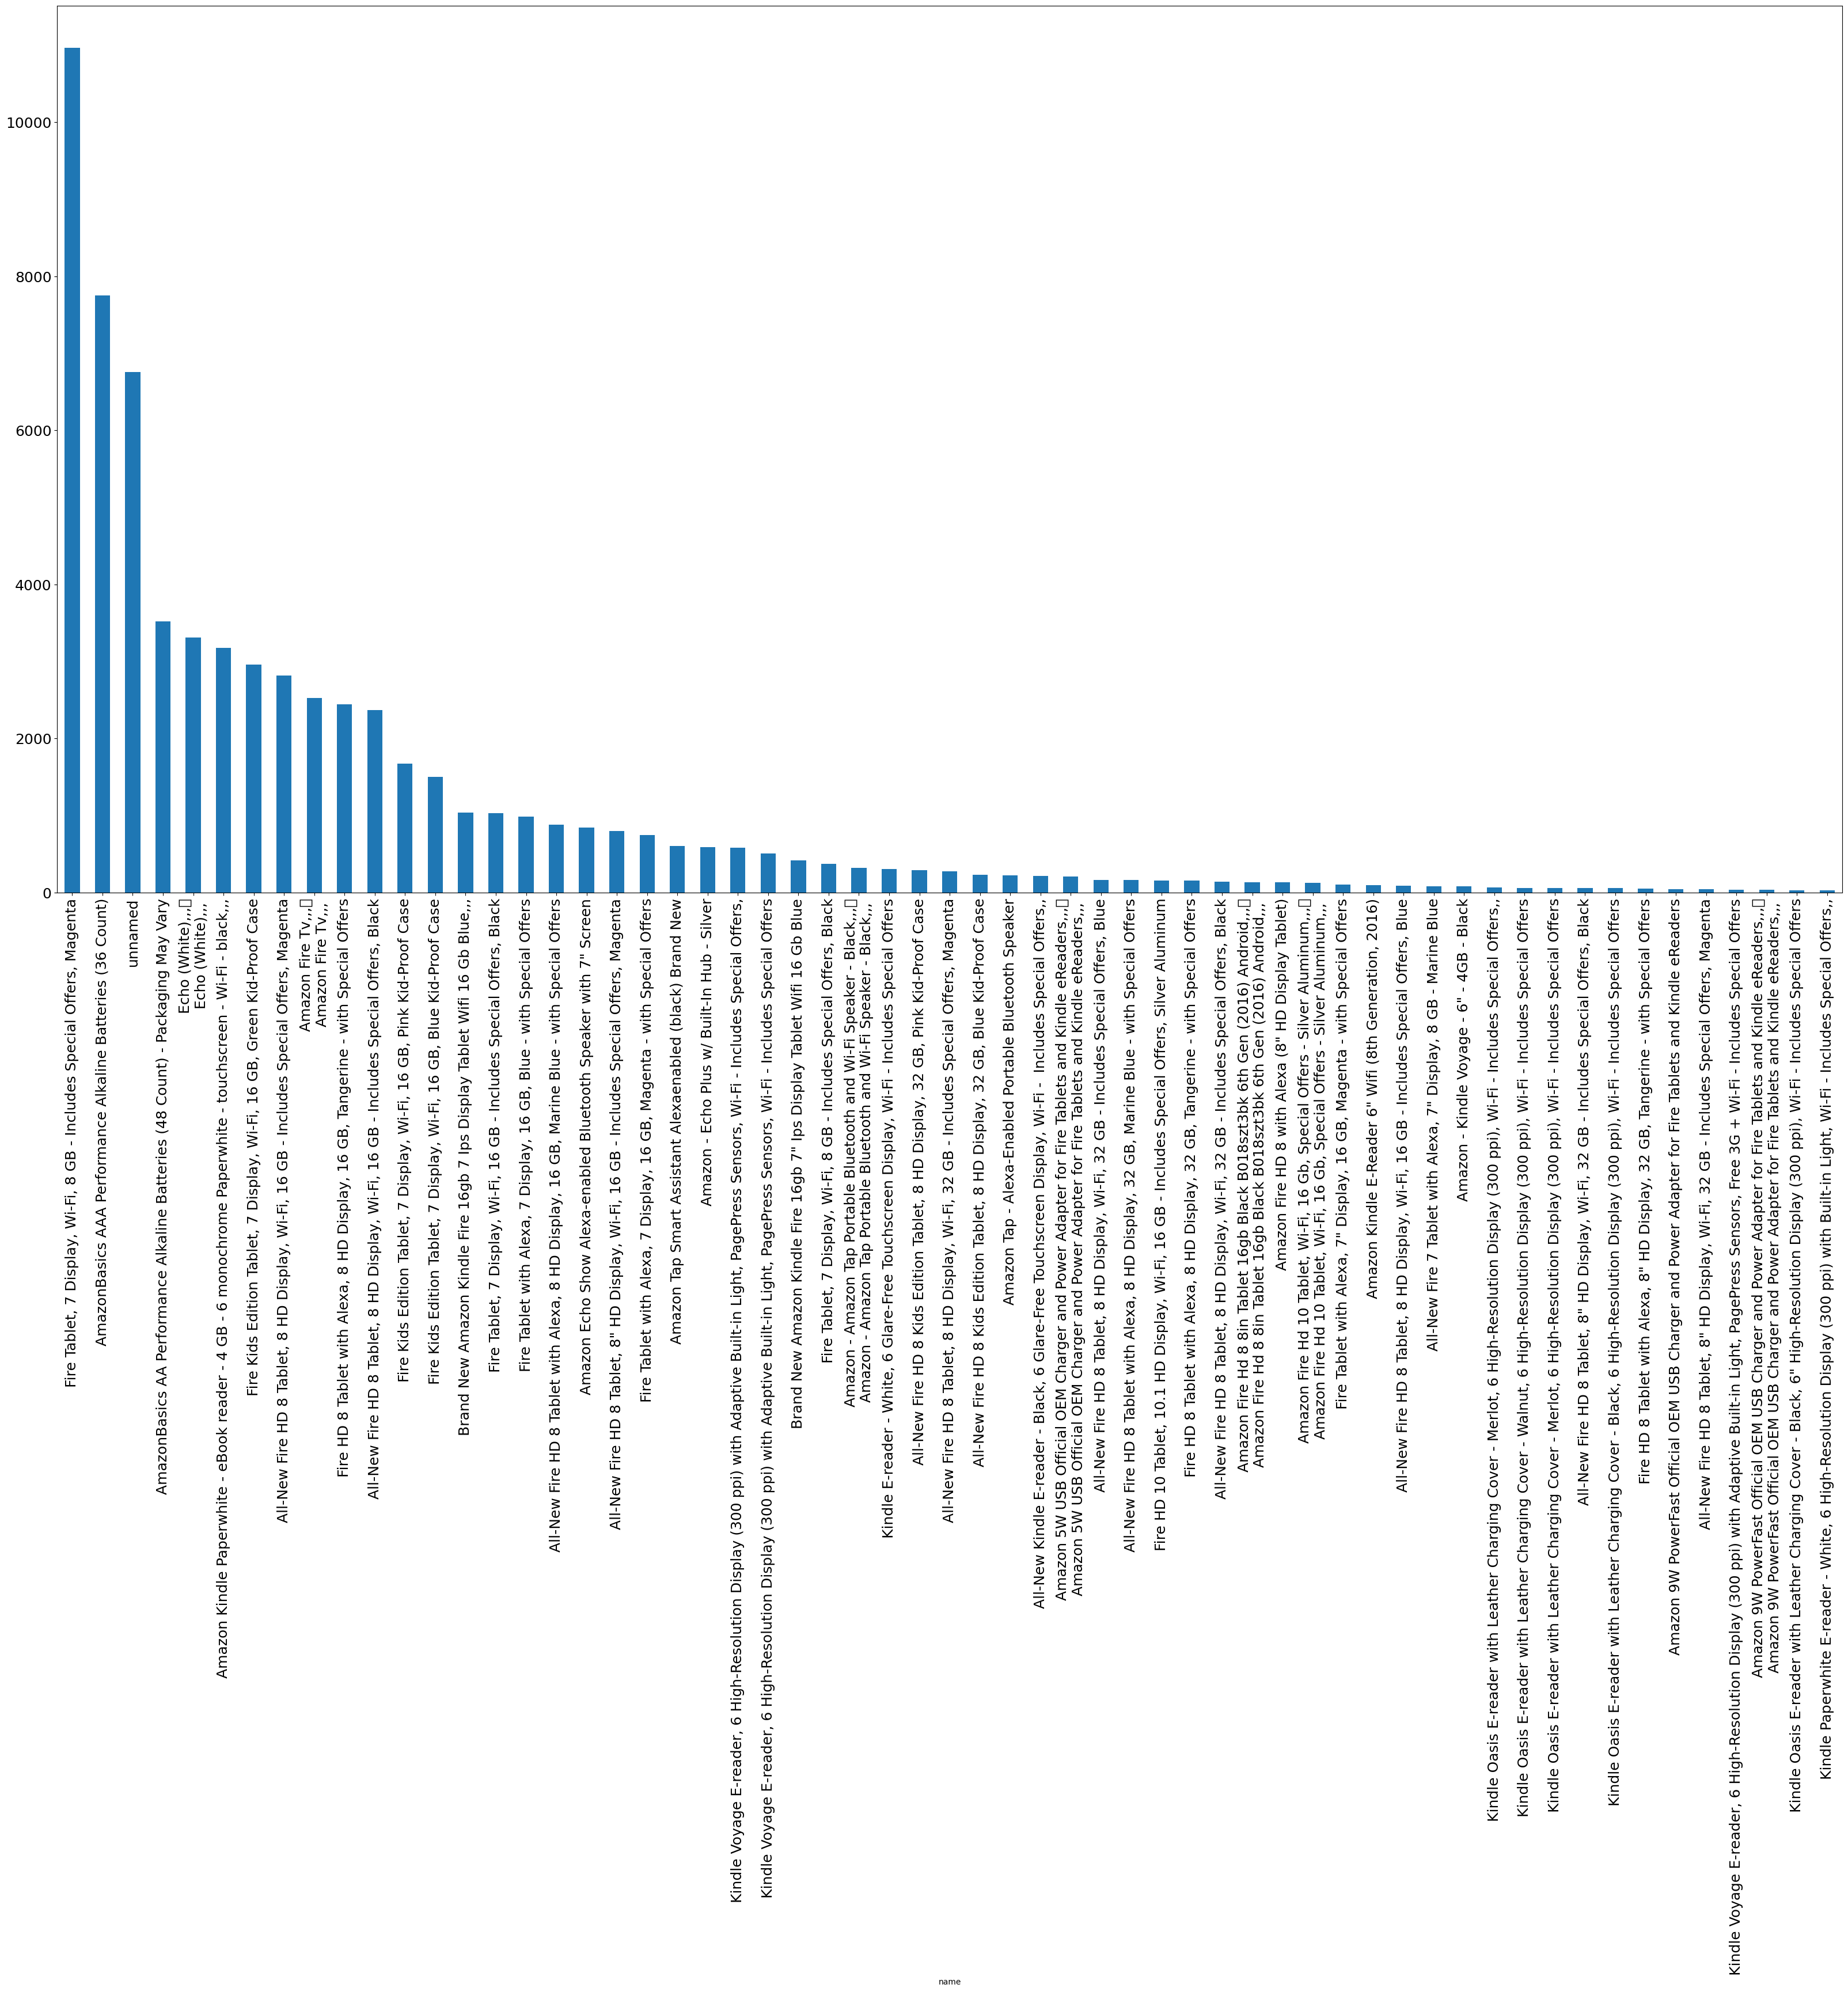

In [8]:
"""


*correlate reviews.rating with the name. if i find that a name more commonly has a negative or positive review, I can check the reviews.text
to see why it was liked or disliked and use that to formulate a marketing tactic for bellabeat.

*a graph first with the number of products 
could not figue out how to plot when the count was greater than n number
"""
name_count = concat_df["name"].value_counts()
name_count[name_count>25].plot(kind='bar', figsize=(40,20), fontsize=18) 

'''
The chart below displays the review count over the amount of 25 for each electronic. The amounts of reviews gives an idea/representation of how may sales there were from 
August of 2014 to November of 2018. From this, we can hypothesyze that the fire tablet 7 display wifi 8GB Magenta was the most sold item in Amazon with ~.14,000 reviews. The magenta was preferred 
over the color black, which is great insight. This can say that people my be more drawn to vibrant colors vs a black etc etc., I would recommend Bellabeat experiment with these vibrant colors" 
'''





# test = concat_df.groupby(['name']).size().reset_index(name='counts')

# fig = plt.figure(figsize=(40,6))
# plt.bar(test['counts']>2000, test['name'],width=.2)
# plt.title("product.names")
# plt.xlabel("product")
# plt.ylabel("count")
# plt.show()
# type(name_count)







' The chart below displays the correlation with word count and ratings. From this we can conclude that   '

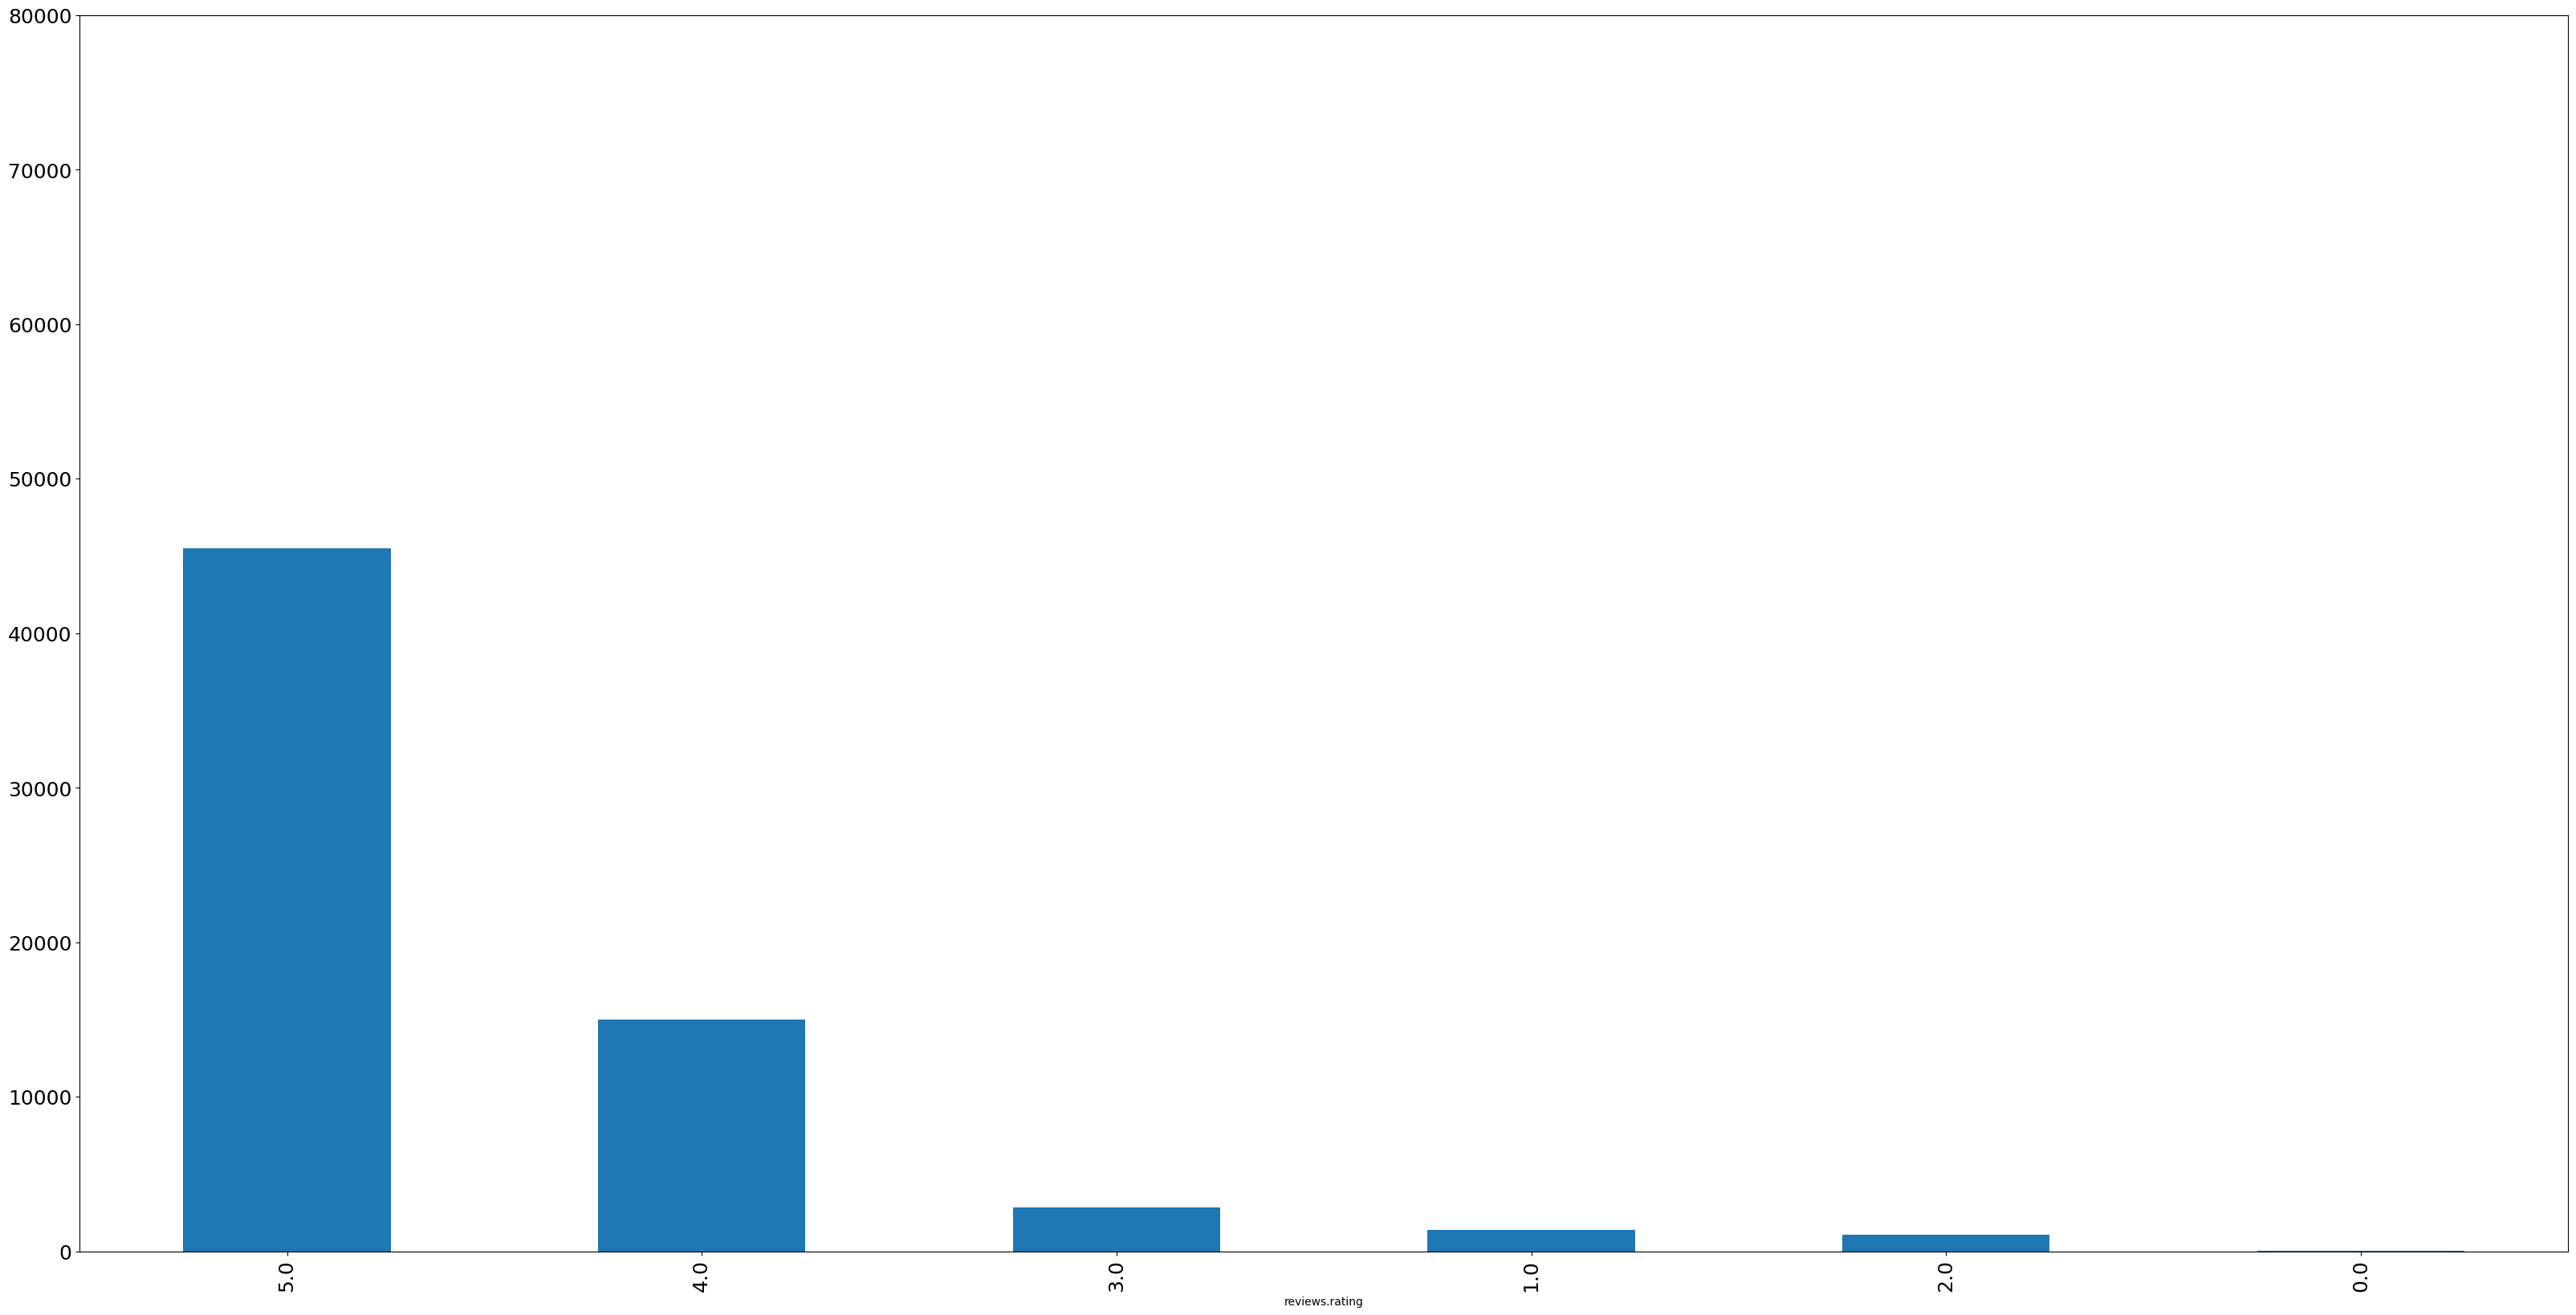

In [10]:
# to compare two columns from the 
#  concat_df 
# concat_df
# lesser_4 = concat_df.loc[concat_df['reviews.rating'] < 4]
# lesser_4_name = lesser_4['name']
# lesser_4_rating = lesser_4['reviews.rating']

# name_to_rating_df = lesser_4[['name', 'reviews.rating']]



# lesser_4.shape
# name_to_rating_df[name_to_rating_df].plot(kind='bar', figsize=(40,20), fontsize=18)
# linearRegressionPlot(concat_df["reviews.text.wordcount"].astype(int), concat_df['dateAdded'], 'reviews.text.wordcount', 'reviews.rating')

'''  if we get counts of negs and pos values, get the counts of names, counts of ratings. 
'''

rr_count = concat_df["reviews.rating"].value_counts()
rr_count[rr_count>3].plot(kind='bar', figsize=(40,20), fontsize=18) #uncomment this to show the graph

rr_count = concat_df["reviews.rating"].value_counts()
# rr_count[rr_count>0].plot(kind='bar', figsize=(40,20), fontsize=18) #uncomment this to show the graph
ax = rr_count.plot(kind='bar')
ax.set_ylim(0,80000)
# ax.set_yscale()
plt.show
rr_count
concat_df

''' The chart below displays the correlation with word count and ratings. From this we can hypothesise that the higher the word count of the review, the higher the rating
of the product. This can serve as a guide for bellabeat stakeholders to determine which products are struggling and which are doing well.'''


